In [0]:


import warnings
warnings.filterwarnings("ignore")
import pandas as pd
df = pd.read_csv("sentiment_full_and_final.csv")
df.head(2)


,Sentences,Labeler_1,Labeler_2,Labeler_3,Labeler_4,Labeler_5,chatgpt1,chatgpt2,chatgpt3,chatgpt4,chatgpt5,MajorityVote,NaiveBayes1,NaiveBayes2,NaiveBayes3,NaiveBayes4,NaiveBayes5,CNN1,CNN2,CNN3,CNN4,CNN5,BERT1,BERT2,BERT3,BERT4,BERT5,RoBERTa1,RoBERTa2,RoBERTa3,RoBERTa4,RoBERTa5
0,I’m done bro all my stuff got corrupt and I’m ...,Negative,Negative,Negative,Negative,Negative,Neutral,Neutral,Neutral,Neutral,Neutral,Negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
1,bro this is FIRE,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,negative,negative,negative,negative,negative,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive


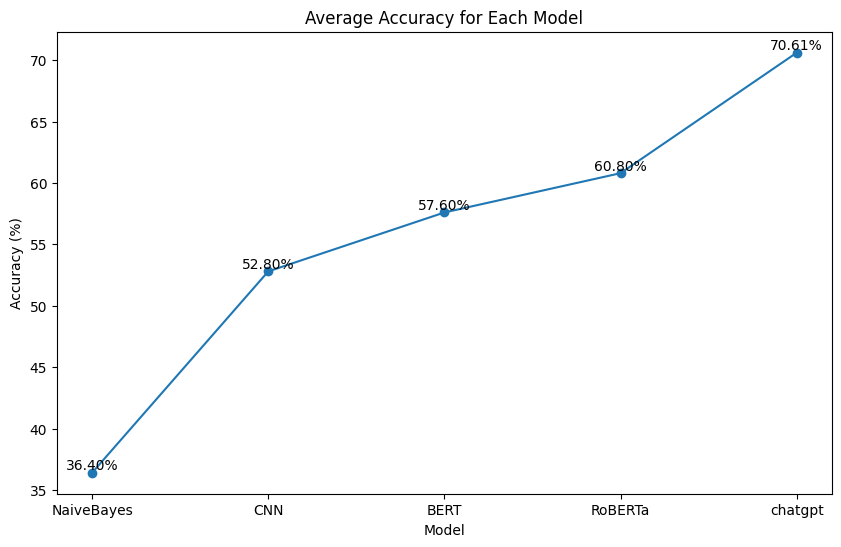

In [0]:
import matplotlib.pyplot as plt  
  
# Specify the order of the models  
model_order = ['NaiveBayes', 'CNN', 'BERT', 'RoBERTa', 'chatgpt']  
  
# Reorder the final DataFrame according to the model_order list  
final = final.set_index('model').loc[model_order].reset_index()  
  
# Create a new figure  
plt.figure(figsize=(10, 6))  
  
# Plot 'Accuracy'  
plt.plot(final['model'], final['Accuracy'], marker='o', linestyle='-')  
  
# Add numbers on each data point  
for i, acc in enumerate(final['Accuracy']):  
    plt.text(i, acc, f'{acc:.2f}%', ha='center', va='bottom')  
  
# Add labels and title  
plt.xlabel('Model')  
plt.ylabel('Accuracy (%)')  
plt.title('Average Accuracy for Each Model')  
  
# Display the plot  
plt.show()  


In [0]:
from sklearn.metrics import classification_report  
  
# x = "Labeler_1"  
# y = "NaiveBayes1"  
# z = "Trail 1"
def class_acc(df,col):
    dfs = []
    for x, y, z in zip([x for x in df.columns if x.find('Labeler_')>=0], [x for x in df.columns if x.find(col)>=0], ["Trail 1", "Trail 2", "Trail 3", "Trail 4", "Trail 5"]):
        d_ = df[[x, y]].dropna(axis=0)  
        
        y_true = d_[x].astype(str).str.lower()  
        y_pred = d_[y].astype(str).str.lower()  
        
        # Get the classification report dictionary  
        report = classification_report(y_true, y_pred, output_dict=True)  
        
        # Assign 'accuracy' value to a variable  
        # accuracy = report['accuracy']  
        
        # Convert the report dictionary to a DataFrame and transpose it  
        report_df = pd.DataFrame(report).transpose()  
        
        # Drop the 'support' column  
        report_df = report_df.drop(columns=['support'])  
        
        # Reset index to turn 'index' into a column  
        report_df.reset_index(inplace=True)  
        
        # Rename 'index' column to 'class'  
        report_df.rename(columns={'index': 'class'}, inplace=True)  
        
        # Exclude the last three rows (accuracy, macro avg, and weighted avg)  
        report_df = report_df[~report_df['class'].isin(['accuracy', 'macro avg', 'weighted avg'])]  
        
        # Add 'accuracy' as a new column  
        # report_df['Overall_accuracy'] = accuracy  
        report_df["Trail"] = z
        dfs.append( report_df)
    final = pd.concat(dfs, ignore_index=True)
    final['model'] = col
    return final
col  = 'NaiveBayes'
class_acc(df,col)

listtoloop = [ 'NaiveBayes', 'CNN', 'BERT', 'RoBERTa', 'chatgpt']
dfs = []
for name in listtoloop:
    dfs.append(class_acc(df,name))
    
final = pd.concat(dfs, ignore_index=True)


,class,precision,recall,f1-score,Trail,model
0,negative,0.322581,0.526316,0.400000,Trail 1,NaiveBayes
1,neutral,0.000000,0.000000,0.000000,Trail 1,NaiveBayes
2,positive,0.368421,0.388889,0.378378,Trail 1,NaiveBayes
3,negative,0.322581,0.526316,0.400000,Trail 2,NaiveBayes
4,neutral,0.000000,0.000000,0.000000,Trail 2,NaiveBayes
...,...,...,...,...,...,...
70,neutral,0.461538,0.545455,0.500000,Trail 4,chatgpt
71,positive,0.714286,0.666667,0.689655,Trail 4,chatgpt
72,negative,0.954545,0.875000,0.913043,Trail 5,chatgpt
73,neutral,0.538462,0.636364,0.583333,Trail 5,chatgpt


# Average Precision Recall and F1-score for `Positive`, `Negetive` and '`Neutral' classes

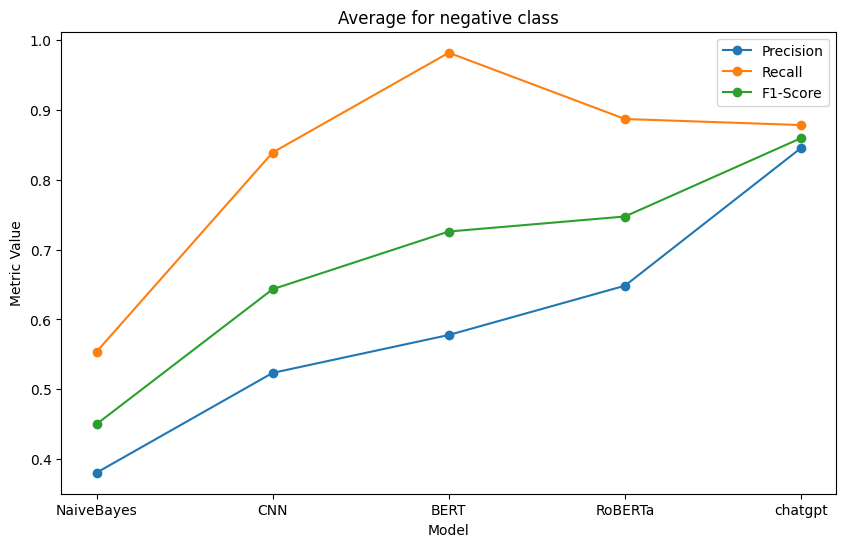

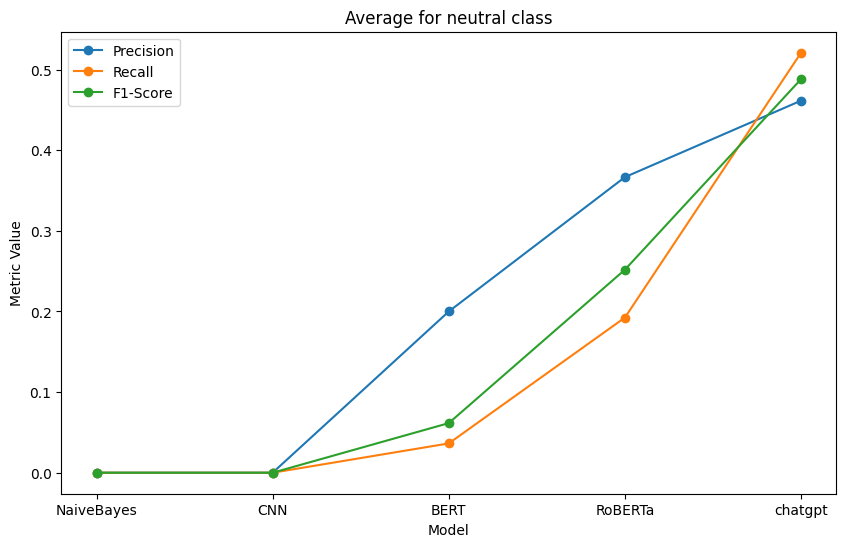

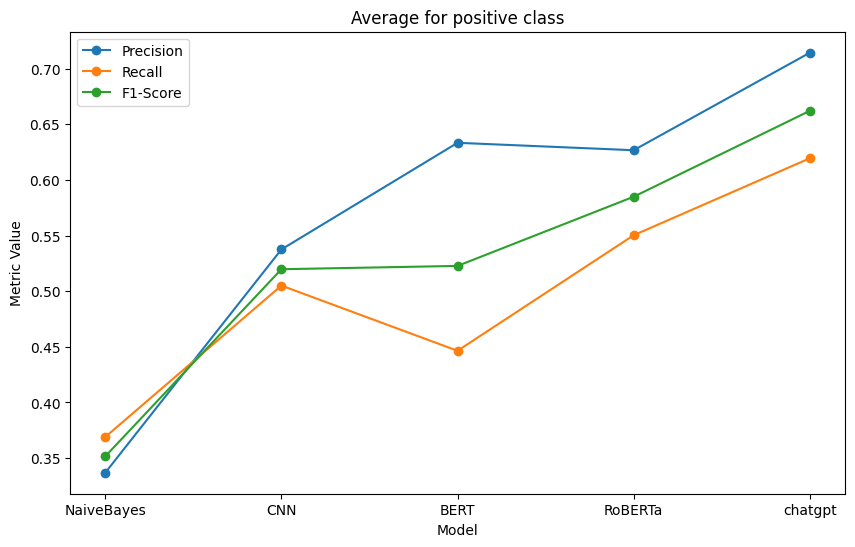

In [0]:
import matplotlib.pyplot as plt  
  
# Calculate the mean of 'precision', 'recall', and 'f1-score' for each combination of 'model' and 'class'  
grouped_df = final.groupby(['model','class'])[['precision', 'recall', 'f1-score']].mean().reset_index()  
  
classes = grouped_df['class'].unique()  
  
# Specify the order of the models  
model_order = ['NaiveBayes', 'CNN', 'BERT', 'RoBERTa', 'chatgpt']  
  
# Loop over each unique 'class'  
for class_name in classes:  
    class_data = grouped_df[grouped_df['class'] == class_name]  
      
    # Reorder the class_data DataFrame according to the model_order list  
    class_data = class_data.set_index('model').loc[model_order].reset_index()  
      
    # Create a new figure for each class  
    plt.figure(figsize=(10, 6))  
      
    # Plot 'precision'  
    plt.plot(class_data['model'], class_data['precision'], marker='o', linestyle='-', label='Precision')  
      
    # Plot 'recall'  
    plt.plot(class_data['model'], class_data['recall'], marker='o', linestyle='-', label='Recall')  
      
    # Plot 'f1-score'  
    plt.plot(class_data['model'], class_data['f1-score'], marker='o', linestyle='-', label='F1-Score')  
  
    # Add a legend  
    plt.legend()  
  
    # Add labels and title  
    plt.xlabel('Model')  
    plt.ylabel('Metric Value')  
    plt.title(f'Average for {class_name} class')  
  
    # Display the plot  
    plt.show()  


# Best Trail for chatGPT and Labeller 

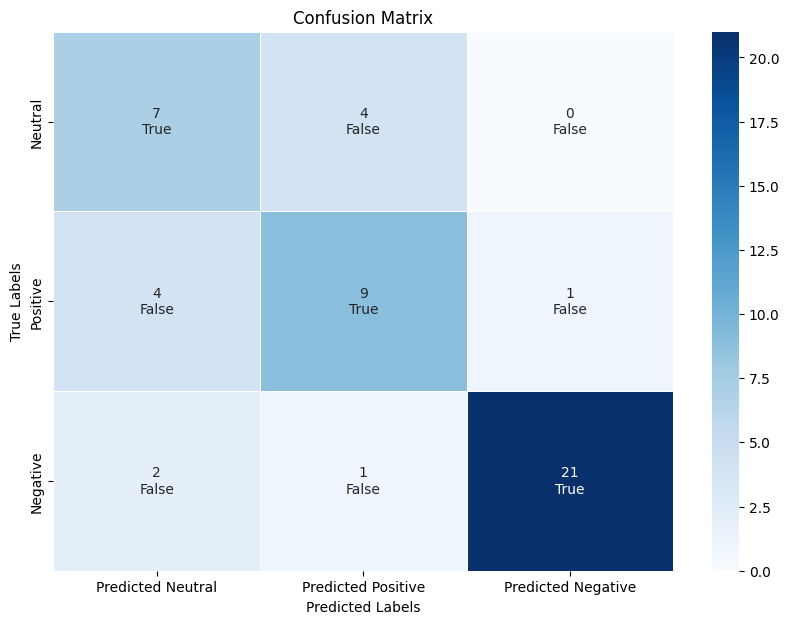

In [0]:
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt  
import seaborn as sns  
  
# assuming y_test and y_pred are your true labels and predictions  
d_ = df[['Labeler_5', 'chatgpt5']].dropna(axis=0) 
y_true = d_['Labeler_5']   
y_pred = d_['chatgpt5']  
  
# Create confusion matrix  
cm = confusion_matrix(y_true, y_pred, labels=["Neutral", "Positive", "Negative"])  
  
# Convert confusion matrix to DataFrame for more flexibility  
cm_df = pd.DataFrame(cm, index=["Neutral", "Positive", "Negative"], columns=["Predicted Neutral", "Predicted Positive", "Predicted Negative"])  
  
# Create an annotation matrix (same size as cm) with TP, TN, FP, FN labels  
annot = np.empty_like(cm).astype(str)  
n = len(cm)  
for i in range(n):  
    for j in range(n):  
        if i == j:  
            annot[i, j] = str(cm[i, j]) + "\nTrue"  
        else:  
            annot[i, j] = str(cm[i, j]) + "\nFalse"  
  
plt.figure(figsize=(10,7))  
sns.heatmap(cm_df, annot=annot, fmt='', cmap='Blues', linewidths=.5)  
plt.title('Confusion Matrix')  
plt.xlabel('Predicted Labels')  
plt.ylabel('True Labels')  
plt.show()  
